In [1]:
import numpy as pd
import time
from IPython.core.debugger import set_trace
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(style="seaborn")

In [2]:
import pandas as pd
dataset = pd.read_csv("dc.csv")
print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   object 
 1   open_SAR    1000 non-null   float64
 2   open_USD    1000 non-null   float64
 3   high_SAR    1000 non-null   float64
 4   high_USD    1000 non-null   float64
 5   low_SAR     1000 non-null   float64
 6   low_USD     1000 non-null   float64
 7   close_SAR   1000 non-null   float64
 8   close_USD   1000 non-null   float64
 9   volume      1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.2+ KB
None


,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [4]:
dataset = dataset.rename(columns={'Unnamed: 0':'Months'})

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Months     1000 non-null   object 
 1   open_SAR   1000 non-null   float64
 2   open_USD   1000 non-null   float64
 3   high_SAR   1000 non-null   float64
 4   high_USD   1000 non-null   float64
 5   low_SAR    1000 non-null   float64
 6   low_USD    1000 non-null   float64
 7   close_SAR  1000 non-null   float64
 8   close_USD  1000 non-null   float64
 9   volume     1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.2+ KB


In [8]:
dataset.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34825.322255,9285.762120,35789.618165,9542.880270,33796.329057,9011.393200,34917.483572,9310.335850,53100.498000
std,21728.028028,5793.522832,22785.946842,6075.604427,20565.410145,5483.524463,21928.280072,5846.917681,35329.832031
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,12045.234688,3211.720000,5743.000000
25%,24254.558752,6467.192500,24686.089152,6582.255000,23721.336256,6325.015000,24252.946080,6466.762500,30045.750000
50%,30714.632128,8189.695000,31321.953152,8351.630000,30010.869568,8002.045000,30713.263232,8189.330000,43795.500000
75%,38317.311744,10216.860000,39077.527200,10419.562500,37158.878816,9907.977500,38329.725568,10220.170000,64909.250000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,38720.000000,152201.770624,40582.810000,402201.000000


<AxesSubplot:>

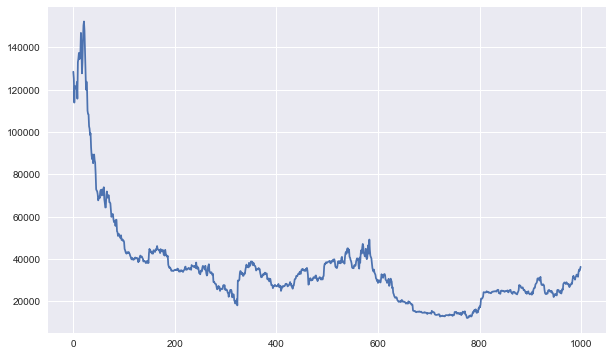

In [9]:
dataset['open_SAR'].plot(figsize=(10,6))

<AxesSubplot:>

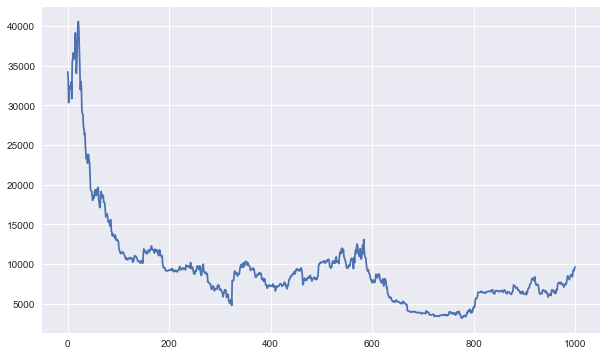

In [10]:
dataset['open_USD'].plot(figsize=(10,6))

In [11]:
x = dataset[['open_SAR','high_SAR','low_SAR','volume']]
y = dataset[['close_SAR']]

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix

reg = LinearRegression()

In [14]:
reg.fit(x_train,y_train)

LinearRegression()

In [15]:
print(reg.coef_)

[[-0.46297244  0.93165564  0.5329148  -0.00424157]]


In [16]:
print(reg.intercept_)

[-56.39162679]


In [18]:
prediction = reg.predict(x_test)

In [19]:
print(x_test)

          open_SAR       high_SAR        low_SAR  volume
993   31786.290176   32866.105344   31120.819200   25632
859   25153.220224   25240.192000   24591.372800   35305
298   27490.056960   27976.821376   26541.580800  103585
553   36843.929600   38211.550464   35002.483200   43809
672   15392.541696   15526.656000   15196.620800   19509
..             ...            ...            ...     ...
462   32463.012352   38891.648000   31767.313152  162588
356   37110.358016   38126.566400   37056.764800   43408
2    113870.357376  126703.438592  111919.811840   92621
478   32111.487360   32418.457600   31557.815808   39137
695   14483.444736   14646.812160   14403.036160   26455

[250 rows x 4 columns]


In [20]:
prediction.shape

(250, 1)

In [21]:
df = pd.DataFrame(y_test.T, index=prediction[:, 0])


In [22]:
dfr = pd.DataFrame({'Actual_price': y_test.values.ravel(),
                    'Predicted': prediction.ravel()})


In [23]:
print(dfr)

      Actual_price      Predicted
0     32552.384384   32323.349513
1     24682.845056   24768.885587
2     26992.828928   26986.270904
3     35540.740608   36953.413057
4     15402.780288   15298.537668
..             ...            ...
245   34616.192000   37387.393975
246   38073.123200   37847.346099
247  125131.570944  124519.609415
248   32096.035712   31931.338158
249   14527.699456   14447.338070

[250 rows x 2 columns]


In [24]:
dfr.head(15)

,Actual_price,Predicted
0,32552.384384,32323.349513
1,24682.845056,24768.885587
2,26992.828928,26986.270904
3,35540.740608,36953.413057
4,15402.780288,15298.537668
5,28079.244800,28411.056349
6,123763.387520,128961.737222
7,35528.814336,35256.230627
8,23981.482752,23993.850109
9,14039.847424,14617.903948


In [25]:
reg.score(x_test,y_test)

0.9970735866562803

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
import math
print('Absolute Mean Error : ',metrics.mean_absolute_error(y_test,prediction)*00.1)
print('Absolute Squared Error : ',metrics.mean_squared_error(y_test,prediction) *00.1)
print('Root Mean Squared Error : ',math.sqrt(metrics.mean_squared_error(y_test,prediction)) *00.1 )

Absolute Mean Error :  45.77968991763175
Absolute Squared Error :  133165.40071783148
Root Mean Squared Error :  115.3973139712669


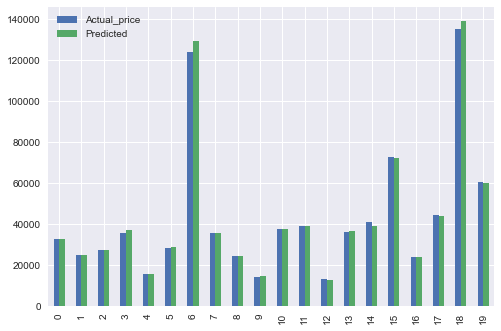

In [33]:
graph = dfr.head(20)
graph.plot(kind= 'bar');
plt.rcParams['figure.figsize']= (10,6)

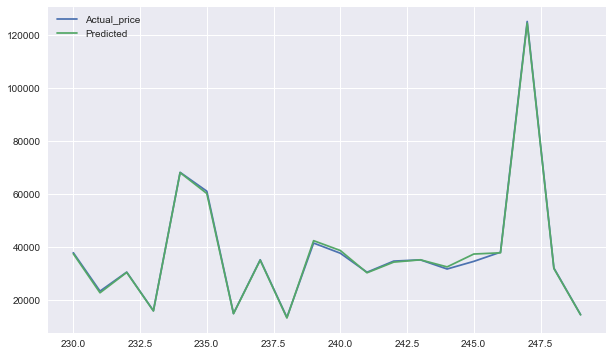

In [34]:
x = dfr.tail(20)
x.plot(kind= 'line');
plt.rcParams['figure.figsize']= (10,6)

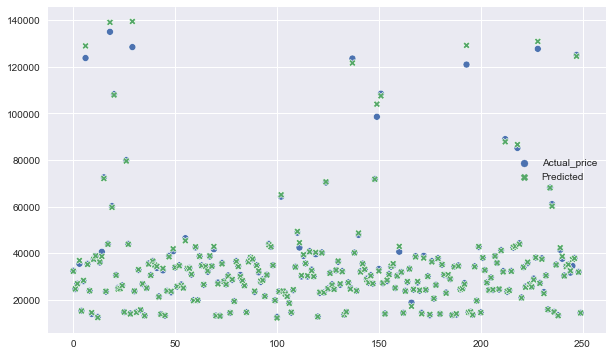

In [36]:
import seaborn as sns 
sns.scatterplot(data=dfr);

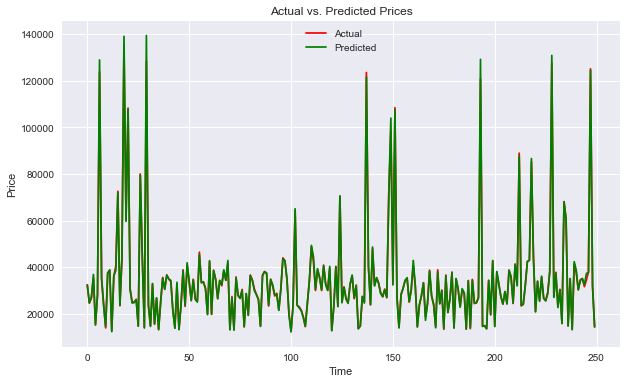

In [37]:
sns.lineplot(data=dfr, x=dfr.index, y='Actual_price', color='red', label='Actual')
sns.lineplot(data=dfr, x=dfr.index, y='Predicted', color='green', label='Predicted')

# Set plot title and axes labels
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')

# Show legend
plt.legend();